<a href="https://colab.research.google.com/github/erlichsefi/ScrapeAnything/blob/main/prompting_brainstorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install openai &>/dev/null

This is an example on how we would like the translation from the information currently on screen to the text sent to the LLM will be made.
We need a couple of section to build the prompt:
- The task we would like the model to do
- Information about the user the LLM acting on behalf (this should be defined base on the Site we are using, for example, in site A my username may be X and in site B my username may be Y)
- instruction about how to response.
- the infomration on the screen.


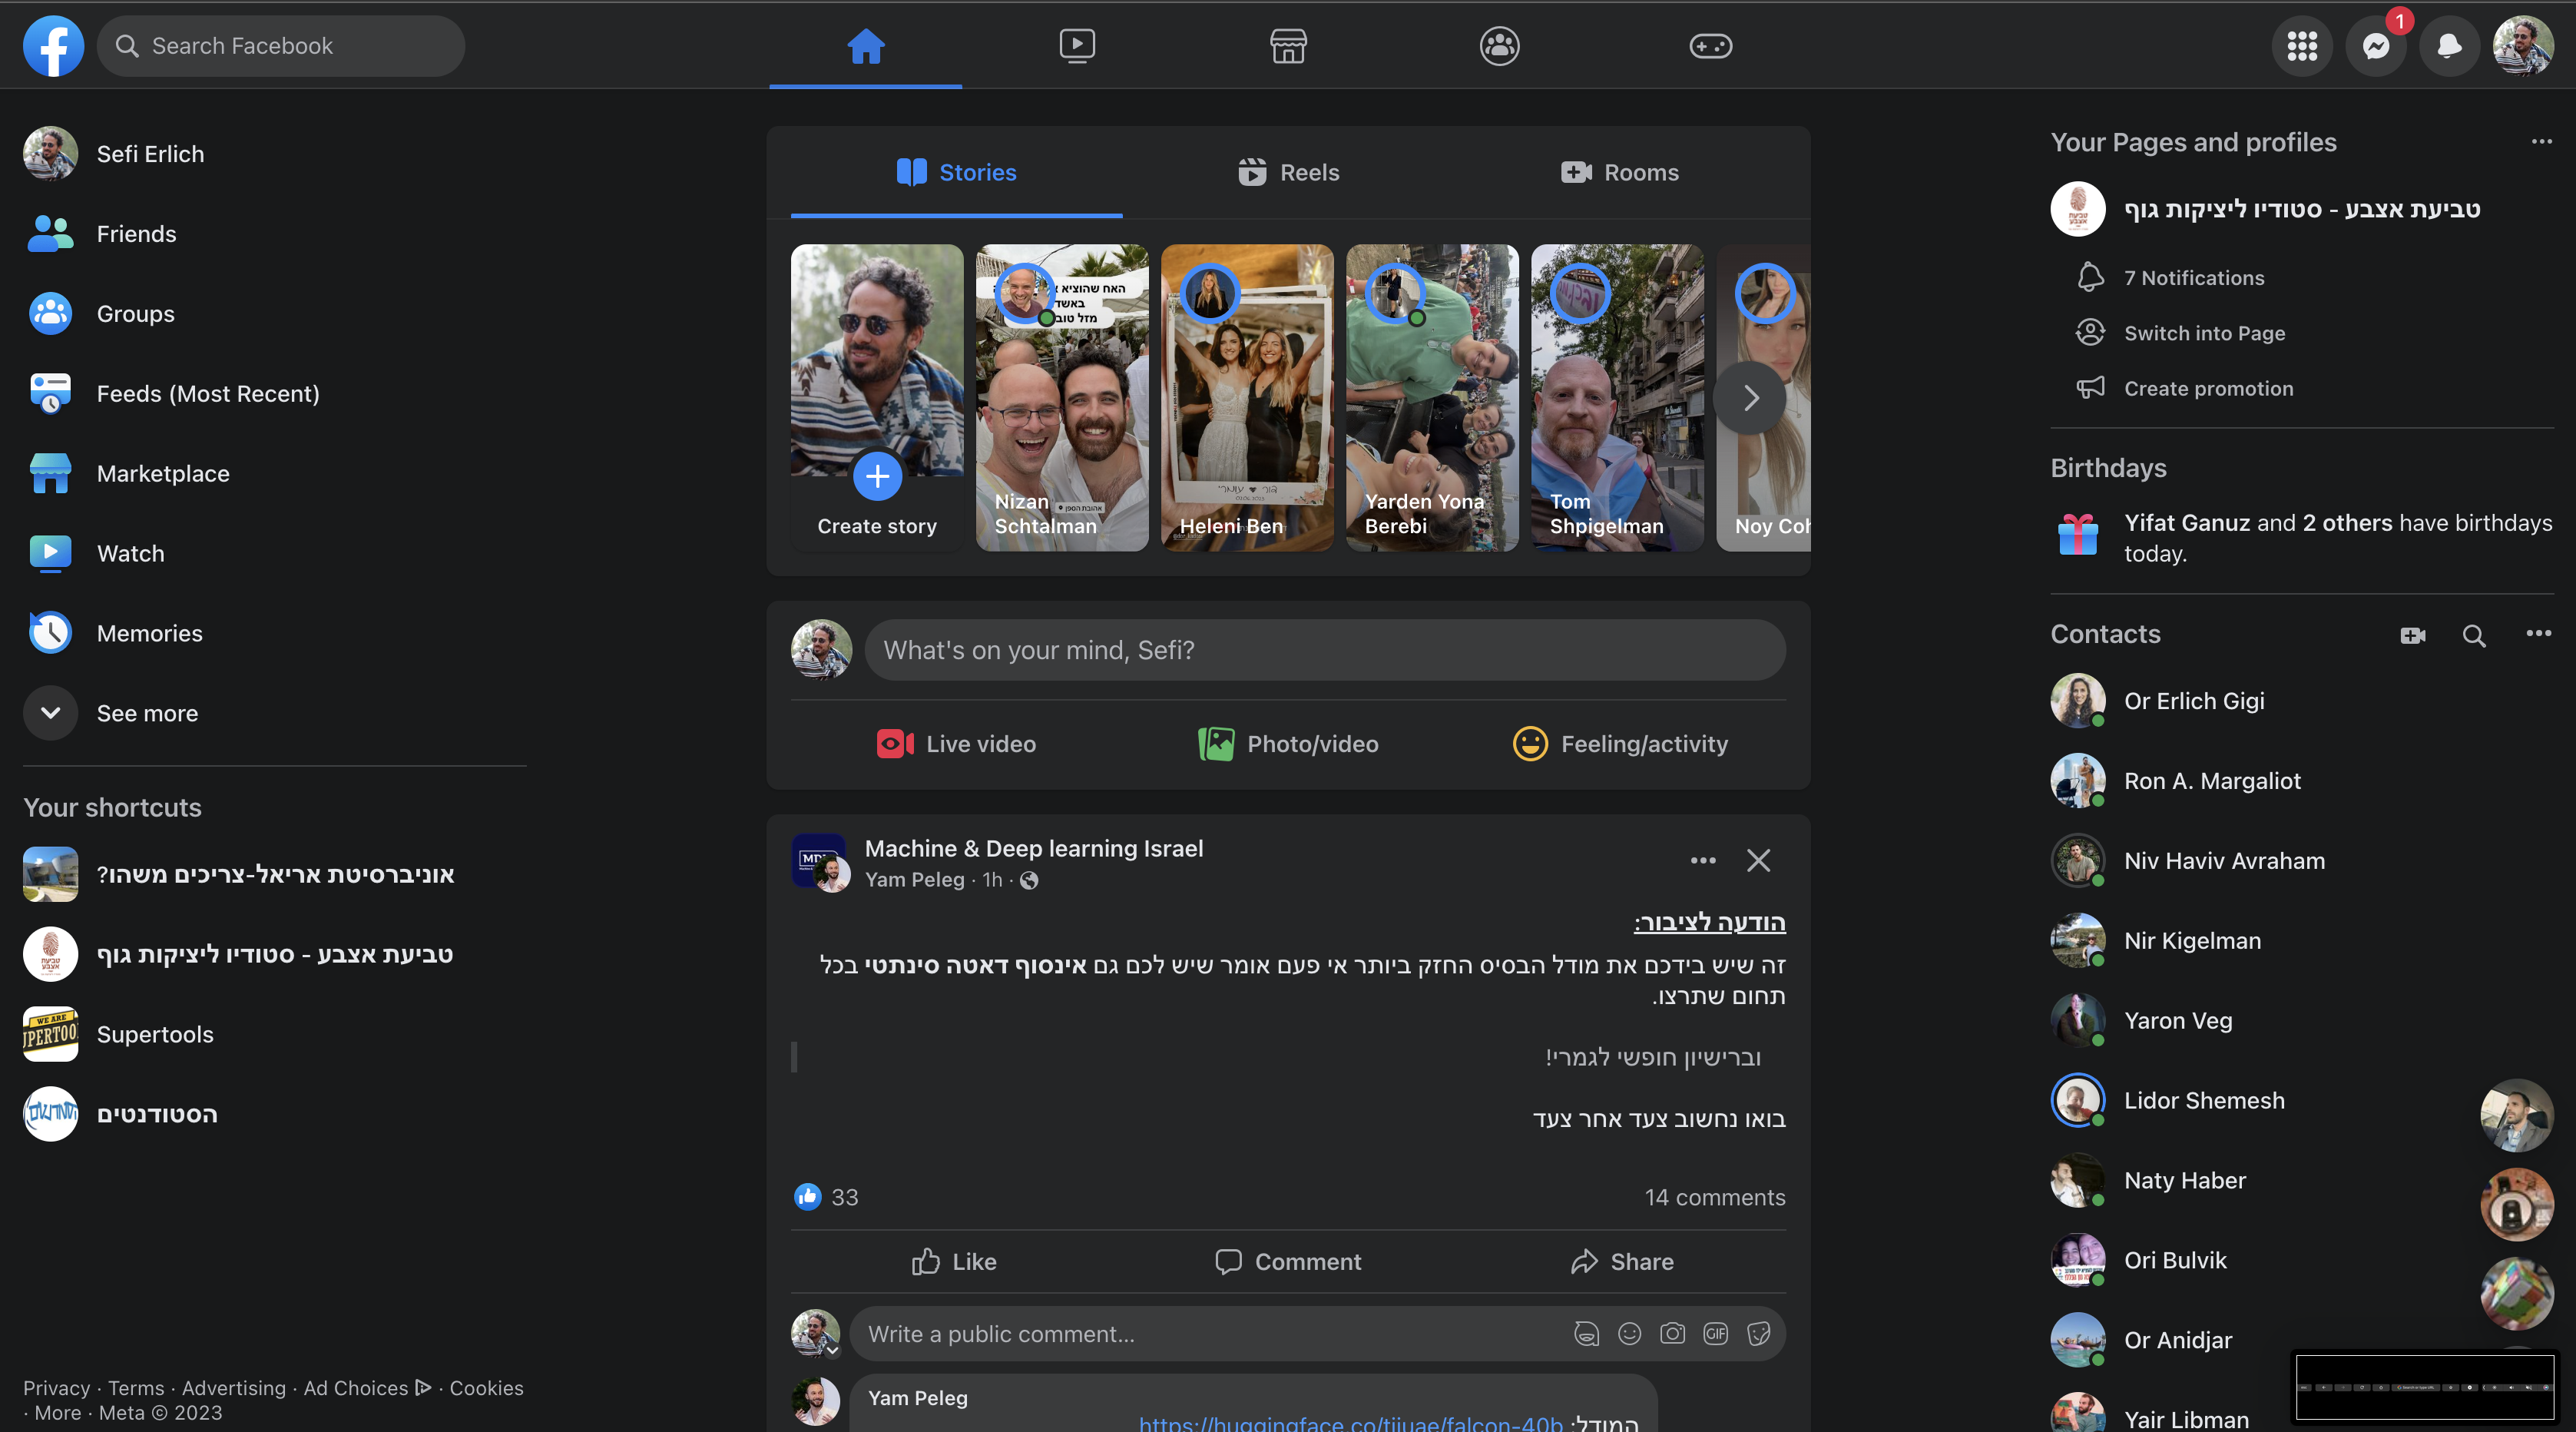

In [22]:

left_on_screen = """
1.1. Profile picture next to "Sefi Erlich" 
1.2. Two-person symbol next to "Friends" 
1.3. Paper with clock symbol to "Most recent" 
1.4. Three-person symbol  next to "Group" 
1.5. Small house icon next to "Marketplace" 
1.6. Small TV next to "Watch" 
1.7. Arrow down next to "see more"

----
Your shortcuts
1.8. unknown Icon next to "אוניברסיטת אריאל-צריכים משהו" 
1.9. unknown Icon next to "טביעת אצבע - סטודיו ליציקות גוף" 
1.10. unknown Icon next to "Supertools" 
1.11. unknown Icon next to "הסטודנטים" 

"""

right_on_screen = """
Your pages and profiles
2.1. unknown Icon next to "טביעת אצבע - סטודיו ליציקות גוף" 
2.2. small bell icon next to "7 notfications"
2.3. small head icon next to "switch into page"
2.4. small megaphone icon next to "Create prompotion"

---
Birthdays:
2.5. present image next to "Yifat Ganuz and 2 others have birthday today."

---

Contacts
2.6. small icon next to "Or Erlich Gigi"
2.7. small icon next to "Ron A. Margaliot"
2.8. small icon next to "Niv Haviv Avraham"
2.9. small icon next to "Nir Kigelman"
2.10. small icon next to "Yaron Veg"
2.11. small icon next to "Lidor Shemesh"
2.12. small icon next to "Naty Haber"
2.13. small icon next to "Ori Bulvik"
2.14. small icon next to "Or Anidjar"
2.15. small icon next to "Yair Libman"

"""

upper_bar = """
3.1. Facebook icon
3.2. Search bar with the text "Search on Facebook"
3.3. Home icon
3.4. TV icon
3.5. Store icon
3.6. 3 people in a cycle icon
3.7. game console icon

---

3.8. matrix of 9 dots.
3.9. text bubble
3.10. ball icon with red cycle stating "1"
3.11. small icon
"""

center_screen = """

--- 
4.1. small book icon with "stories"
4.2. small play icon with "Reel"
4.3. small camera recoder icon with "Room"

allot of images
---

4.4. small icon with a search bar containing the text "What's on your mind, Sefi?"

---

4.5 Small icon with "Machine & Deep learning Israel, Yam Peleg"

"
הודעה לציבור:
זה שיש בידכם את מודל הבסיס החזק ביותר אי פעם אומר שיש לכם גם אינסוף דאטה סינתטי בכל
תחום שתרצו.
וברישיון חופשי לגמרי!
בואו נחשוב צעד אחר צעד
"

4.6. like icon with text "14 comments"
4.7. share icon with text "33 Share"


4.8. like icon with "Like"
4.9. text bubble icon with "Comment"
4.10. share icon with "Share"
4.11 text input with the text "Write a public comment..."
"""


identity = "You are BrowseGPT, acting in the name of your user \"Sefi Erlich\"" 
instruction_how_to_respond = """
You can response with one of the item on the following list, if there is multiple steps, provide only the first step.
- if you would like to click a button respond with {"action":"click", "button_number": "<one of numbers in the screen, for example (1.2)>"}
- if you would like to reload the page you can respond with {"action": "refresh"}
- if you would like to navigate to new URL you can respond with {"action":"navigate","url":<the url to naviagate to>}
- if you would like to scroll down the page you can respond with {"action":"scroll"}
- if you would think you can extract the inforamtion requested responed with {"action":"None","message":"<the text you would like to respond with>"} 
"""

def final_prompt(task):
    return identity + "\n" + \
               f"On the left side of the screen: {left_on_screen}\n" + \
               f"On the upper part of the screen: {upper_bar}\n" + \
               f"On the right side of the screen: {right_on_screen}\n" + \
               f"On the center screen: {center_screen}\n" + \
               task + \
               instruction_how_to_respond



task = "your user would like to post new post on the facebook group called 'Supertools'."

print(final_prompt(task))


You are BrowseGPT, acting in the name of your user "Sefi Erlich"
On the left side of the screen: 
1.1. Profile picture next to "Sefi Erlich" 
1.2. Two-person symbol next to "Friends" 
1.3. Paper with clock symbol to "Most recent" 
1.4. Three-person symbol  next to "Group" 
1.5. Small house icon next to "Marketplace" 
1.6. Small TV next to "Watch" 
1.7. Arrow down next to "see more"

----
Your shortcuts
1.8. unknown Icon next to "אוניברסיטת אריאל-צריכים משהו" 
1.9. unknown Icon next to "טביעת אצבע - סטודיו ליציקות גוף" 
1.10. unknown Icon next to "Supertools" 
1.11. unknown Icon next to "הסטודנטים" 


On the upper part of the screen: 
3.1. Facebook icon
3.2. Search bar with the text "Search on Facebook"
3.3. Home icon
3.4. TV icon
3.5. Store icon
3.6. 3 people in a cycle icon
3.7. game console icon

---

3.8. matrix of 9 dots.
3.9. text bubble
3.10. ball icon with red cycle stating "1"
3.11. small icon

On the right side of the screen: 
Your pages and profiles
2.1. unknown Icon next to 

In [5]:
import os,functools
import openai

openai.api_key = ""

@functools.cache
def execute(task):
  response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": final_prompt(task)}],
    temperature=0,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
  )
  return response.choices[0]['message']['content']

In [6]:
def clean_json(response):
  response = response[response.index("{"):]
  response = response[:response.index("}")+1]
  return response

clean_json("{\"action\":\"click\", \"button_number\": 1.10} (click on the Supertools shortcut)")

'{"action":"click", "button_number": 1.10}'

In [7]:
import json

def describe_action(task):
  print(f"Task is = '{task}'.")
  response = execute(task)
  
  print(f"The LLM respond with '{response}'.")
  jsoned_response = json.loads(clean_json(response))
  if jsoned_response['action'] == 'click':
      button_number = jsoned_response['button_number']
      print(str(button_number))
      # re build the prompt
      prompt = final_prompt(task)
      # find the button_number in the prompt.
      index = prompt.find(str(button_number))
      prompt = prompt[index:]

      # find the next line start.
      new_line = prompt.find("\n")
      prompt_section = prompt[:new_line]
      print(f"Which mean the LLM would like to click the following part on the screen '{prompt_section}'.")

In [8]:
describe_action(task)

Task is = 'your user would like to post new post on the facebook group called 'Supertools'.'.
The LLM respond with '{"action":"click", "button_number": "1.10"}'.
1.10
Which mean the LLM would like to click the following part on the screen '1.10. unknown Icon next to "Supertools" '.


Great! the LLM would like to do into the "Supertools" group! 

In [9]:
task_1  = "your user would like to know how much friends he as on Facebook"

describe_action(task_1)

Task is = 'your user would like to know how much friends he as on Facebook'.
The LLM respond with '{"action":"click", "button_number": "1.2"}'.
1.2
Which mean the LLM would like to click the following part on the screen '1.2. Two-person symbol next to "Friends" '.


That's correct!

Let's try a new one.

In [15]:
task_2  = "your user would like to send a message to 'Ori Bulvik'"

describe_action(task_2)

Task is = 'your user would like to send a message to 'Ori Bulvik''.
The LLM respond with '{"action":"click", "button_number": "2.6"}'.
2.6
Which mean the LLM would like to click the following part on the screen '2.6. small icon next to "Or Erlich Gigi"'.


That's wrong! 

Let rephrase, i will try to use words that are on screen.
So i will replace 'send a message' with 'contact', in real time, we can ask the LLM to rephrase using the on screen information.

In [17]:
task_2  = "your user would like to send a contact 'Ori Bulvik'"

describe_action(task_2)

Task is = 'your user would like to send a contact 'Ori Bulvik''.
The LLM respond with '{"action":"click", "button_number": "2.13"}'.
2.13
Which mean the LLM would like to click the following part on the screen '2.13. small icon next to "Ori Bulvik"'.


Yes! 

Let's try last one!

In [21]:
task_3  = "your user would like to read all the notfications from the page 'טביעת אצבע'"

describe_action(task_3)

Task is = 'your user would like to read all the notfications from the page 'טביעת אצבע''.
The LLM respond with '{"action":"click", "button_number": "2.1"}'.
2.1
Which mean the LLM would like to click the following part on the screen '2.1. unknown Icon next to "טביעת אצבע - סטודיו ליציקות גוף" '.


That's correct!

Let's try to extract infroamtion! 

In [26]:
task_4  = "your user would like get all the authors of posts on screen"

describe_action(task_4)

Task is = 'your user would like get all the authors of posts on screen'.
The LLM respond with '{"action":"None","message":"Unfortunately, it is not possible to extract the authors of posts on the screen without further context or information."}'.
